In [74]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import mean_squared_error, f1_score

In [75]:
# Генерируем уникальный seed
my_code = "Матвеичева"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [76]:
# Читаем данные из файла
example_data = pd.read_csv("datasets/Fish.csv")

In [77]:
example_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [78]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(example_data))
print(val_test_size)

32


In [79]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(example_data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [80]:
# Значения в числовых столбцах преобразуем к отрезку [0,1].
# Для настройки скалировщика используем только обучающую выборку.
num_columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

ct = ColumnTransformer(transformers=[('numerical', MinMaxScaler(), num_columns)], remainder='passthrough')
ct.fit(train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['Weight', 'Length1', 'Length2', 'Length3',
                                  'Height', 'Width'])])

In [81]:
# Преобразуем значения, тип данных приводим к DataFrame
sc_train = pd.DataFrame(ct.transform(train))
sc_test = pd.DataFrame(ct.transform(test))
sc_val = pd.DataFrame(ct.transform(val))

In [82]:
# Устанавливаем названия столбцов
column_names = num_columns + ['Species']
sc_train.columns = column_names
sc_test.columns = column_names
sc_val.columns = column_names

In [83]:
sc_train

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.116129,0.331959,0.325581,0.346014,0.311006,0.402909,Roach
1,0.467742,0.501031,0.515504,0.581522,0.849262,0.705571,Bream
2,0.109032,0.298969,0.302326,0.333333,0.336998,0.39293,Roach
3,0.294194,0.670103,0.660853,0.664855,0.322232,0.461618,Pike
4,0.193548,0.4,0.393411,0.38587,0.339946,0.505723,Perch
...,...,...,...,...,...,...,...
90,0.174194,0.342268,0.350775,0.371377,0.372462,0.451187,Whitefish
91,0.251613,0.453608,0.45155,0.474638,0.450217,0.607155,Roach
92,0.43871,0.501031,0.515504,0.576087,0.797523,0.716481,Bream
93,0.529032,0.610309,0.612403,0.610507,0.545987,0.786874,Perch


In [84]:
# Задание №1 - анализ деревьев принятия решений в задаче регрессии
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# criterion : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [85]:
# Выбираем 4 числовых переменных, три их них будут предикторами, одна - зависимой переменной
n = 4
labels = random.sample(num_columns, n)

y_label = labels[0]
x_labels = labels[1:]

print(x_labels)
print(y_label)

['Length2', 'Length1', 'Height']
Weight


In [86]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [87]:
x_train

,Length2,Length1,Height
0,0.325581,0.331959,0.311006
1,0.515504,0.501031,0.849262
2,0.302326,0.298969,0.336998
3,0.660853,0.670103,0.322232
4,0.393411,0.4,0.339946
...,...,...,...
90,0.350775,0.342268,0.372462
91,0.45155,0.453608,0.450217
92,0.515504,0.501031,0.797523
93,0.612403,0.610309,0.545987


In [88]:
# Создайте 4 модели с различными критериями ветвления criterion: 'mse', 'friedman_mse', 'mae', 'poisson'.
# Решите получившуюся задачу регрессии с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры splitter, max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.

In [89]:
r_model1 = DecisionTreeRegressor(criterion='squared_error')
r_model2 = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model3 = DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model4 = DecisionTreeRegressor(criterion='poisson', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)

r_models = []
r_models.append(r_model1)
r_models.append(r_model2)
r_models.append(r_model3)
r_models.append(r_model4)

for model in r_models:
    model.fit(x_train, y_train)

In [90]:
mse_list = []
for model in r_models:
    val_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, val_pred)
    mse_list.append(mse)
    print(mse)

0.003939696279916754
0.05769686511806722
0.05802346058792923
0.0034450414932362125


In [91]:
print("Модель с минимальной среднеквадратичной MSE: ", mse_list.index(min(mse_list))+1)

Модель с минимальной среднеквадратичной MSE:  4


In [92]:
i_min = mse_list.index(min(mse_list))
r_model = r_models[i_min]
r_model.get_params()

test_pred = r_model.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
print(mse)

0.004830344302809573


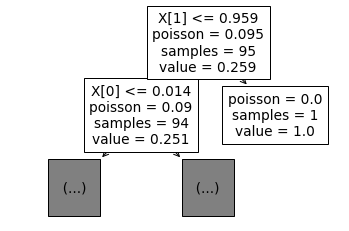

In [93]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(r_model, max_depth=1)
plt.show()

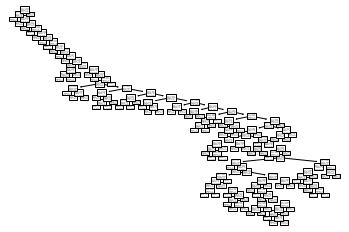

In [94]:
plot_tree(r_model)
plt.show()

In [95]:
# Задание №2 - анализ деревьев принятия решений в задаче классификации
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# criterion : {“gini”, “entropy”}, default=”gini”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [96]:
# Выбираем 2 числовых переменных, которые будут параметрами элементов набора данных
# Метка класса всегда 'Species'
n = 2
x_labels = random.sample(num_columns, n)
y_label = 'Species'

print(x_labels)
print(y_label)

['Length2', 'Width']
Species


In [97]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [98]:
x_train

,Length2,Width
0,0.325581,0.402909
1,0.515504,0.705571
2,0.302326,0.39293
3,0.660853,0.461618
4,0.393411,0.505723
...,...,...
90,0.350775,0.451187
91,0.45155,0.607155
92,0.515504,0.716481
93,0.612403,0.786874


In [99]:
# Создайте 4 модели с различными критериями ветвления criterion : 'gini', 'entropy' и splitter : 'best', 'random'.
# Решите получившуюся задачу классификации с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.

In [100]:
d_model1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model4 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)

d_models = []
d_models.append(d_model1)
d_models.append(d_model2)
d_models.append(d_model3)
d_models.append(d_model4)

for model in d_models:
    model.fit(x_train, y_train)

In [101]:
f1_list = []
for model in d_models:
    val_pred = model.predict(x_val)
    f1 = f1_score(y_val, val_pred, average='weighted')
    f1_list.append(f1)
    print(f1)

0.43052884615384623
0.5053291062801932
0.45240660919540227
0.26468531468531464


In [102]:
print("Модель с максимальным значением F1: ", f1_list.index(max(f1_list))+1)

Модель с максимальным значением F1:  2


In [103]:
i_max = f1_list.index(max(f1_list))
d_model = d_models[i_max]
d_model.get_params()
      
test_pred = d_model.predict(x_test)
f1 = f1_score(y_test, test_pred, average='weighted')
print(f1)

0.6935163488472311


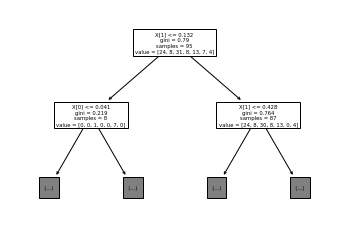

In [104]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(d_model, max_depth=1)
plt.show()

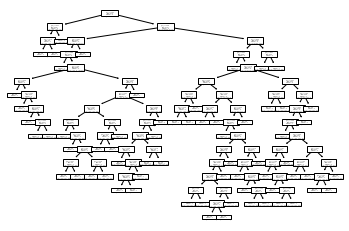

In [105]:
plot_tree(d_model)
plt.show()